Alan Andree Rodríguez Levario - 222791133

# Hands on 2 - kNN

## 1.1 Fundamentos de la Técnica

El algoritmo k-Nearest Neighbors (kNN), o k-Vecinos Más Cercanos, es un método de aprendizaje supervisado no paramétrico y basado en instancias. Se le considera un algoritmo "flojo" (lazy learner) porque no construye un modelo explícito durante la fase de entrenamiento.

En lugar de aprender una función a partir de los datos, kNN simplemente memoriza el conjunto de datos de entrenamiento completo.

Para clasificar un nuevo punto de datos, el algoritmo sigue estos pasos:

1. Calcula la distancia (comúnmente la distancia Euclidiana) desde el nuevo punto a todos los puntos en el conjunto de entrenamiento.

2. Encuentra los 'k' puntos de entrenamiento que están más cerca del nuevo punto (los "k vecinos más cercanos").

3. Realiza una votación: El nuevo punto se asigna a la clase que es más frecuente (la "mayoría") entre sus 'k' vecinos.

La elección de 'k' y la métrica de distancia son cruciales para su rendimiento. Dado que se basa en distancias, es muy sensible a la escala de las características, por lo que casi siempre requiere estandarización de datos.

## 1.2 Modelo Matemático

El "modelo" de kNN no es una fórmula predictiva única (como en una regresión), sino un algoritmo que se basa en dos conceptos clave: una métrica de distancia y una regla de votación.

1. Métrica de DistanciaLa métrica más utilizada es la Distancia Euclidiana. Esta calcula la distancia "recta" entre dos puntos en un espacio multidimensional.Fórmula (LaTeX):Dados dos puntos $p$ y $q$ en un espacio de $n$ dimensiones (es decir, con $n$ características), la distancia euclidiana $d(p, q)$ se define como:

$$d(p, q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + \dots + (p_n - q_n)^2}$$


## 1.3 Descripción de la Librería

* Librería: sklearn.neighbors

  * Clase: KNeighborsClassifier

  * Descripción: Implementa la lógica de votación de kNN para clasificación. Su parámetro principal es n_neighbors, que define el valor de k.

* Librería: sklearn.datasets

    * Función: load_iris

    * Descripción: Carga el dataset Iris, que contiene las 4 características y las 3 clases de flores.

* Librería: sklearn.model_selection

  * Función: train_test_split

  * Descripción: Se usa para dividir nuestro dataset en un conjunto de entrenamiento (para "memorizar") y un conjunto de prueba (para evaluar).

* Librería: sklearn.preprocessing

  * Clase: StandardScaler

  * Descripción: Crítico para kNN. Dado que kNN se basa en distancias, si una característica tiene una escala mucho mayor que otra (ej. metros vs. centímetros), dominará el cálculo de la distancia. El escalado (estandarización) asegura que todas las características tengan media 0 y desviación estándar 1, contribuyendo equitativamente.

* Librería: sklearn.metrics

  * Función: accuracy_score: Calcula la exactitud (porcentaje de aciertos).

  * Función: confusion_matrix: Genera la matriz de confusión para ver los tipos de error.

* Librería: pandas

  * Descripción: Usaremos pandas.DataFrame para facilitar el análisis estadístico (.describe()).

* Librería: seaborn y matplotlib.pyplot

  * Descripción: seaborn se usará para crear los gráficos de dispersión (pairplot y heatmap) de forma sencilla y estéticamente agradable.

## 1.4 Pipeline de Implementación

In [1]:
# Celda de importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# Carga de datos
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print(f"Características: {feature_names}")
print(f"Clases: {target_names}")

Características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Clases: ['setosa' 'versicolor' 'virginica']


### 1.4.1 Preprocesamiento

**Análisis Estadístico**

Primero, convertimos los datos a un DataFrame de pandas para usar la función .describe(), que nos da la media (avg), desviación estándar (desv std), min, max y los cuartiles.

In [3]:
# Crear un DataFrame para análisis
df = pd.DataFrame(X, columns=feature_names)
df['species_id'] = y
df['species_name'] = [target_names[i] for i in y]

# Calcular estadísticas descriptivas (avg, std, min, max, etc.)
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  species_id  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


**Gráfico de Dispersión (Scatter Plot)**

Usamos seaborn.pairplot para visualizar la relación entre todas las combinaciones de características, coloreadas por la especie. Esto nos ayuda a ver qué tan separables son las clases.

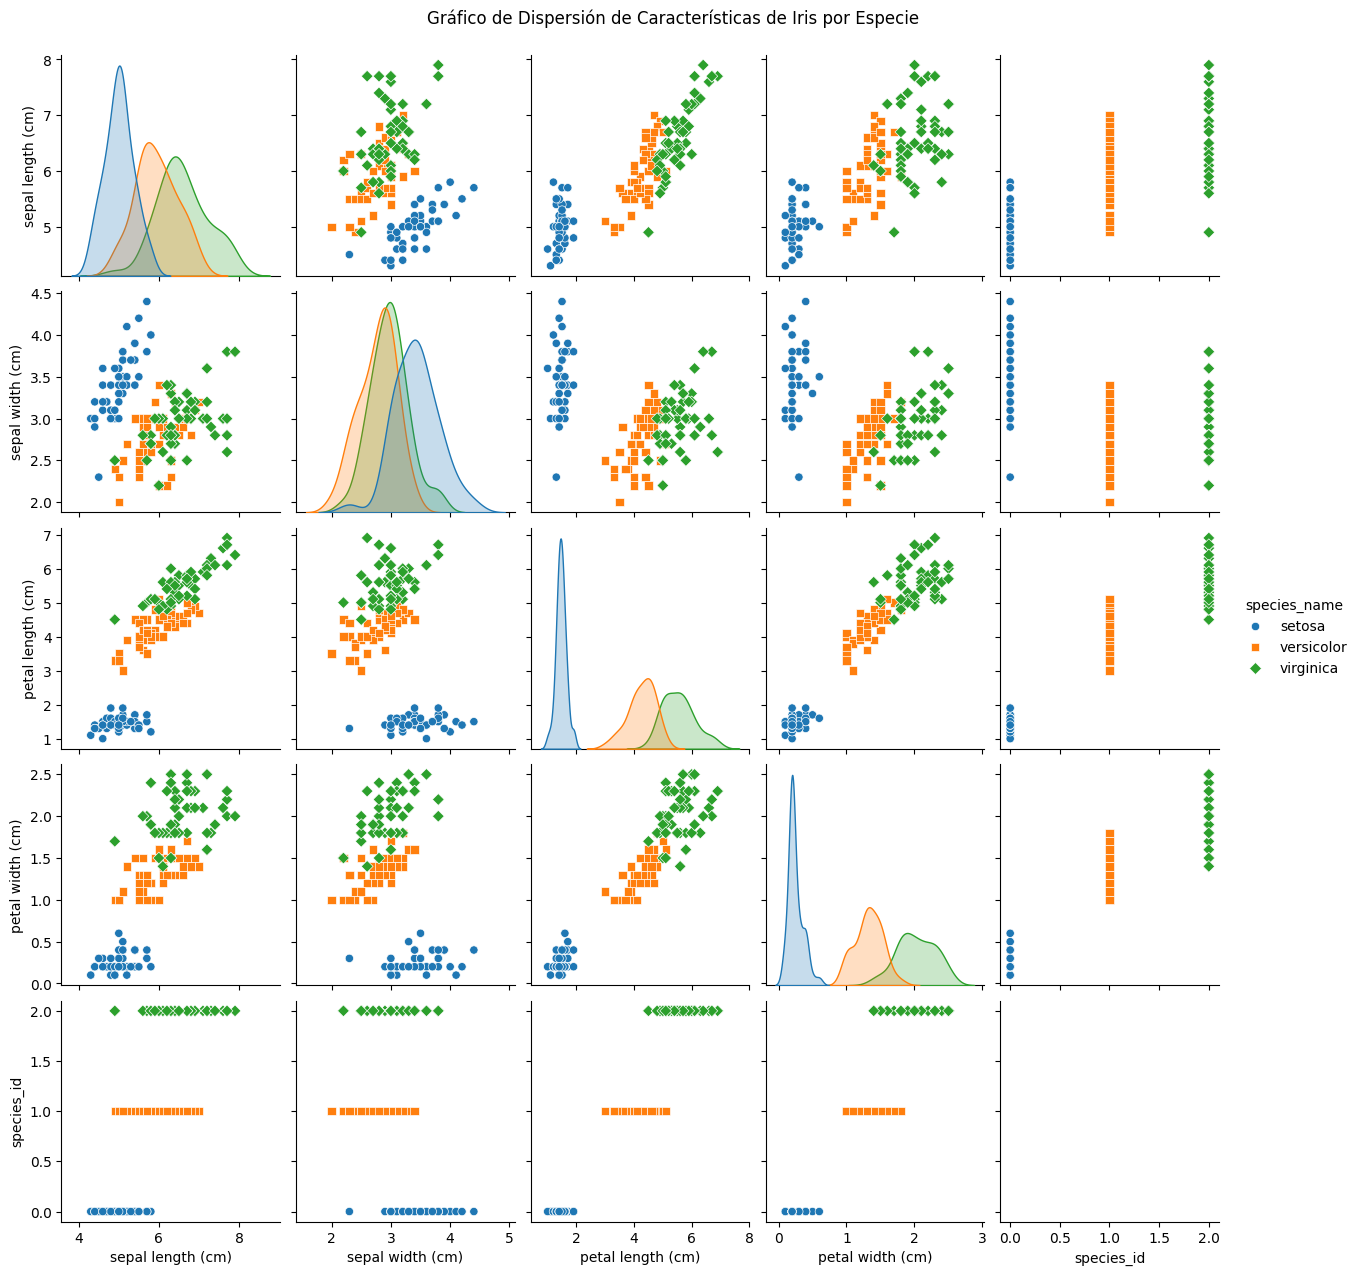

In [4]:
# Gráfico de Dispersión (Pair Plot)
sns.pairplot(df, hue='species_name', markers=["o", "s", "D"])
plt.suptitle("Gráfico de Dispersión de Características de Iris por Especie", y=1.02)
plt.show()

### 1.4.2 Feature Engineering

Descripción de la selección de variables:

A diferencia de un modelo de regresión (que busca predecir un valor continuo), nuestro objetivo es la clasificación.

Al observar el Pairplot, notamos:

* La especie 'setosa' (azul) es muy fácil de separar de las otras dos, especialmente usando petal length (cm) y petal width (cm).

* 'versicolor' (naranja) y 'virginica' (verde) están más mezcladas, pero aun así muestran patrones separables.

Para un modelo de clasificación kNN, no es necesario seleccionar solo dos variables, de hecho, el modelo suele ser más robusto si utiliza todas las características disponibles (en este caso, las 4), ya que le da más dimensiones para encontrar vecinos.

La parte más importante de Feature Engineering para kNN no es la selección, sino la transformación (escalado). Como kNN usa distancias, debemos escalar los datos.

**Pasos:**

1. División de datos: Separar los datos en entrenamiento (70%) y prueba (30%).

2. Escalado de características: Aplicar StandardScaler a X_train y X_test.

In [5]:
# 1. División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Se aplica la misma transformación (transform) a los datos de prueba
X_test_scaled = scaler.transform(X_test)

**Entrenamiento del Modelo**

In [6]:
# Instanciar y entrenar el modelo
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)

# kNN entrena simplemente almacenando los datos de X_train_scaled y y_train
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### 1.4.3 Predicción
Aquí creamos la función que recibe un patrón, lo escala y predice su clase.

In [7]:
def predecir_flor(patron):

    # Recibe un patrón de 4 características [l_sep, a_sep, l_pet, a_pet], lo escala y predice la especie de Iris.

    # Asegurarse de que el patrón sea un array 2D para sklearn
    patron_np = np.array(patron).reshape(1, -1)

    # Escalar el patrón con el mismo escalador (scaler)
    patron_scaled = scaler.transform(patron_np)

    # Realizar la predicción
    prediccion_id = knn_model.predict(patron_scaled)

    # Obtener el nombre de la especie
    nombre_especie = target_names[prediccion_id[0]]

    print(f"Patrón de entrada: {patron}")
    print(f"Patrón escalado: {patron_scaled[0]}")
    print(f"Predicción (ID): {prediccion_id[0]}")
    print(f"Clase predecida: '{nombre_especie}'")
    return nombre_especie

# Prueba de la función
# Ejemplo 1: Un patrón que debería ser 'setosa' (pétalos pequeños)
patron_setosa = [5.1, 3.5, 1.4, 0.2]
print("--- Predicción 1 ---")
predecir_flor(patron_setosa)

# Ejemplo 2: Un patrón que debería ser 'virginica' (pétalos grandes)
patron_virginica = [6.7, 3.0, 5.2, 2.3]
print("\n--- Predicción 2 ---")
predecir_flor(patron_virginica)

--- Predicción 1 ---
Patrón de entrada: [5.1, 3.5, 1.4, 0.2]
Patrón escalado: [-0.89573553  1.17645543 -1.44207638 -1.40568508]
Predicción (ID): 0
Clase predecida: 'setosa'

--- Predicción 2 ---
Patrón de entrada: [6.7, 3.0, 5.2, 2.3]
Patrón escalado: [ 1.033541   -0.02284379  0.77607503  1.43531914]
Predicción (ID): 2
Clase predecida: 'virginica'


np.str_('virginica')

### 1.4.4 Model Evaluation
Evaluamos el rendimiento del modelo usando el conjunto de prueba (X_test_scaled y y_test) que el modelo nunca vio.

In [9]:
# Obtener predicciones para todo el conjunto de prueba
y_pred = knn_model.predict(X_test_scaled)

In [10]:
# Calcular Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (Exactitud): {accuracy * 100:.2f}%")

Accuracy (Exactitud): 100.00%



--- Matriz de Confusión ---
Matriz:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


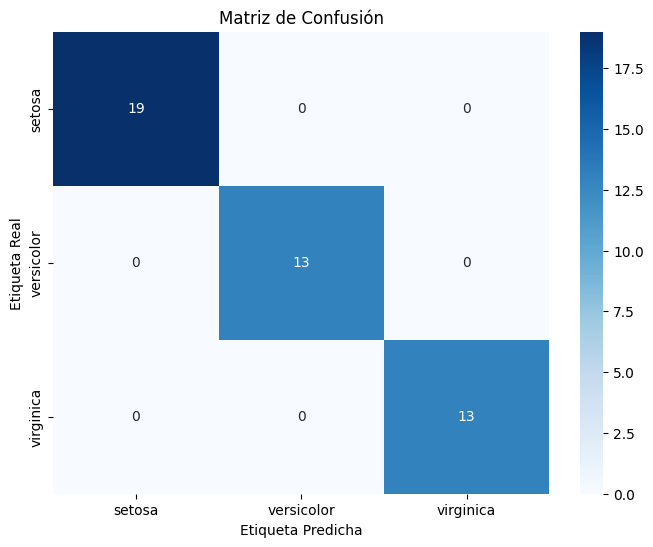

In [12]:
# Calcular Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

print(f"\n--- Matriz de Confusión ---")
print("Matriz:")
print(cm)

# Graficar la Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names,
            yticklabels=target_names)
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.title('Matriz de Confusión')
plt.show()

## Referencias Bibliográficas

Documentación oficial de Scikit-learn sobre sklearn.neighbors.KNeighborsClassifier. (Consultado en https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

Documentación oficial de Scikit-learn sobre la importancia del escalado. (Consultado en https://scikit-learn.org/stable/modules/preprocessing.html)